<a href="https://colab.research.google.com/github/raghavkaushik/DeepLearning/blob/main/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Conv2D, GlobalMaxPooling2D, Input, Dropout
import tensorflow as tf
import numpy as np


In [15]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(Xtrain,Ytrain),(Xtest,Ytest)=fashion_mnist.load_data()

In [16]:
Xtrain,Xtest=Xtrain/255.0, Xtest/255.0

In [17]:
print(Xtrain.shape)
#As conv2d requires 3D dimensional input(HxWxC)
Xtrain=np.expand_dims(Xtrain,-1)
Xtest=np.expand_dims(Xtest,-1)
print(Xtrain.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [19]:
k=len(set(Ytrain))
print("Number of classes:",k)

Number of classes: 10


In [24]:
i=Input(shape=Xtrain[0].shape)
x=Conv2D(32,(3,3),strides=2, activation='relu', padding='same')(i)
x=Conv2D(64,(3,3),strides=2, activation='relu', padding='same')(x)
x=Conv2D(128,(3,3),strides=2, activation='relu', padding='same')(x)
x = GlobalMaxPooling2D()(x)
x = Dropout(0.2)(x)
x=Dense(1024,activation='relu')(x)
x=Dense(k,activation='softmax')(x)

model=Model(i,x)


In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r=model.fit(Xtrain,Ytrain, validation_data=(Xtest,Ytest), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 56s 29ms/step - loss: 0.4123 - accuracy: 0.8494 - val_loss: 0.3633 - val_accuracy: 0.8666
Epoch 2/15
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3281 - accuracy: 0.8799 - val_loss: 0.3236 - val_accuracy: 0.8780
Epoch 3/15
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2886 - accuracy: 0.8931 - val_loss: 0.3011 - val_accuracy: 0.8884
Epoch 4/15
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2626 - accuracy: 0.9021 - val_loss: 0.2789 - val_accuracy: 0.8952
Epoch 5/15
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2420 - accuracy: 0.9092 - val_loss: 0.2810 - val_accuracy: 0.8968
Epoch 6/15
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2250 - accuracy: 0.9155 - val_loss: 0.2775 - val_accuracy: 0.8971
Epoch 7/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2104 - accuracy: 0.9214 - val_loss: 0.2828 -

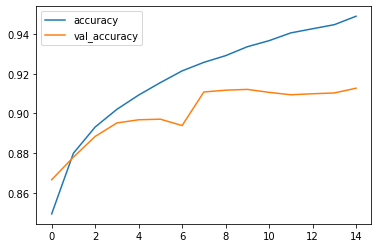

In [28]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

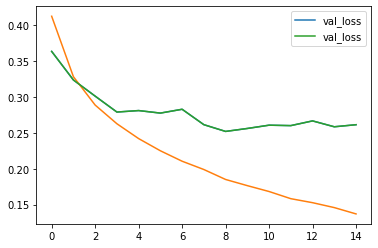

In [29]:
plt.plot(r.history['val_loss'],label='val_loss')
plt.plot(r.history['loss'],label='')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
pred=model.predict(Xtest).argmax(axis=1)
print(confusion_matrix(Ytest,pred))

[[855   1   7  20   3   1 105   0   8   0]
 [  1 983   1  10   1   0   2   0   2   0]
 [ 16   2 858   8  38   0  74   0   4   0]
 [ 15   3   8 920  28   0  23   0   2   1]
 [  2   1  71  18 863   0  44   0   1   0]
 [  0   0   0   1   0 973   0  16   0  10]
 [ 98   3  55  25  62   0 752   0   5   0]
 [  0   0   0   0   0   3   0 985   1  11]
 [  3   1   0   2   4   3   0   4 983   0]
 [  0   0   0   0   0   7   1  37   0 955]]
